# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Read and see data

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Merging train and test data for data wrangling

In [6]:
test["Survived"]=0

In [7]:
data=pd.concat([train,test],axis=0,ignore_index=True)

In [8]:
print(data.shape)
data.head()

(1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [9]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.261268
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.439494
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A50C0BA780>,
      dtype=object)

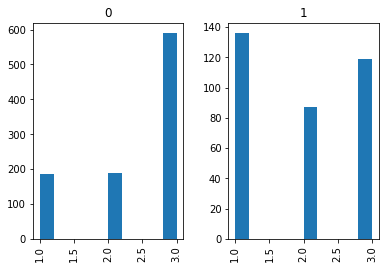

In [10]:
data.hist("Pclass","Survived",stacked=True)

# Extracting titles from names to check impact on model

In [11]:
#data["Pclass"]=pd.Categorical(data["Pclass"],ordered=True)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
le = LabelEncoder();
data.Name = data.Name.apply(get_title);
data.Name = le.fit_transform(data["Name"].values);

# Dropping unrelational features and hadnling missing values

In [12]:
data.drop(["Ticket"],inplace=True,axis=1)

In [13]:
data.shape

(1309, 11)

In [14]:
data["Sex"]=pd.get_dummies(data["Sex"],drop_first=True)

In [15]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,13,0,1,3,1,1,0
1,38.0,C85,C,71.2833,14,0,2,1,0,1,1
2,26.0,NaN,S,7.9250,10,0,3,3,0,0,1
3,35.0,C123,S,53.1000,14,0,4,1,0,1,1
4,35.0,NaN,S,8.0500,13,0,5,3,1,0,0


In [16]:
data.describe()

,Age,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,12.252865,0.385027,655.000000,2.294882,0.644003,0.498854,0.261268
std,14.413493,51.758668,1.871503,0.865560,378.020061,0.837836,0.478997,1.041658,0.439494
min,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,10.000000,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,13.000000,0.000000,655.000000,3.000000,1.000000,0.000000,0.000000
75%,39.000000,31.275000,13.000000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,17.000000,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000


In [17]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data=pd.concat([data,pd.get_dummies(data["Embarked"],drop_first=True)],axis=1)   
data.drop("Embarked",inplace=True,axis=1)
data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Q,S
0,22.0,NaN,7.2500,13,0,1,3,1,1,0,0,1
1,38.0,C85,71.2833,14,0,2,1,0,1,1,0,0
2,26.0,NaN,7.9250,10,0,3,3,0,0,1,0,1
3,35.0,C123,53.1000,14,0,4,1,0,1,1,0,1
4,35.0,NaN,8.0500,13,0,5,3,1,0,0,0,1


In [18]:
data["Cabin"].isnull().sum()

1014

In [19]:
data.drop(["Cabin"],inplace=True,axis=1)
#cabin_count=data["Cabin"].value_counts()
#cabin_count.head()
#print(data["Cabin"].mode())  
#data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
#data["Cabin"].isna().sum()
#data["Cabin"]=data['Cabin'].apply(lambda x: cabin_count[x])
#data['Cabin'].head()



In [20]:
data.drop(["PassengerId"],inplace=True,axis=1)
data.head()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Q,S
0,22.0,7.2500,13,0,3,1,1,0,0,1
1,38.0,71.2833,14,0,1,0,1,1,0,0
2,26.0,7.9250,10,0,3,0,0,1,0,1
3,35.0,53.1000,14,0,1,0,1,1,0,1
4,35.0,8.0500,13,0,3,1,0,0,0,1


# Checking relations between features

In [21]:
data.corr()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Q,S
Age,1.000000,0.178740,0.300248,-0.150917,-0.408106,0.063645,-0.243699,-0.066096,-0.019458,-0.070001
Fare,0.178740,1.000000,-0.079179,0.221539,-0.558629,-0.185523,0.160238,0.173653,-0.130059,-0.169922
Name,0.300248,-0.079179,1.000000,-0.096017,0.005556,0.230127,-0.181231,-0.163108,-0.128900,0.089425
Parch,-0.150917,0.221539,-0.096017,1.000000,0.018322,-0.213125,0.373587,0.054908,-0.100943,0.071881
Pclass,-0.408106,-0.558629,0.005556,0.018322,1.000000,0.124617,0.060832,-0.244686,0.230491,0.091320
Sex,0.063645,-0.185523,0.230127,-0.213125,0.124617,1.000000,-0.109609,-0.404020,-0.088651,0.115193
SibSp,-0.243699,0.160238,-0.181231,0.373587,0.060832,-0.109609,1.000000,-0.014375,-0.048678,0.073709
Survived,-0.066096,0.173653,-0.163108,0.054908,-0.244686,-0.404020,-0.014375,1.000000,-0.012730,-0.077095
Q,-0.019458,-0.130059,-0.128900,-0.100943,0.230491,-0.088651,-0.048678,-0.012730,1.000000,-0.491656
S,-0.070001,-0.169922,0.089425,0.071881,0.091320,0.115193,0.073709,-0.077095,-0.491656,1.000000


In [22]:
data.describe()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Q,S
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,12.252865,0.385027,2.294882,0.644003,0.498854,0.261268,0.093965,0.699771
std,14.413493,51.758668,1.871503,0.865560,0.837836,0.478997,1.041658,0.439494,0.291891,0.458533
min,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,13.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,31.275000,13.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,512.329200,17.000000,9.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [23]:
#data["Age"].fillna(data["Age"].mean(),inplace=True)
grouped = data.groupby(['Sex','Pclass'])
data["Age"] = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [24]:
data.describe()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Q,S
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.261398,33.295479,12.252865,0.385027,2.294882,0.644003,0.498854,0.261268,0.093965,0.699771
std,13.218275,51.758668,1.871503,0.865560,0.837836,0.478997,1.041658,0.439494,0.291891,0.458533
min,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,14.454200,13.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,36.000000,31.275000,13.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,512.329200,17.000000,9.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [25]:
data["Fare"].fillna(data["Fare"].median(),inplace=True)

In [26]:
data.isnull().sum()

Age         0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Q           0
S           0
dtype: int64

In [27]:
#from sklearn.feature_selection import SelectKBest,chi2

In [28]:
#feature=SelectKBest(score_func=chi2,k=8).fit(train.drop("Survived",axis=1),train["Survived"])

In [29]:
#list(feature.get_params())

# Splitting train and test data

In [30]:
train=data[0:891]
test_predict=data[891:]
test_predict.drop("Survived",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
print(train.shape)
print(test_predict.shape)

(891, 10)
(418, 9)


# Validating best model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [33]:
#param_test1 = { 'max_depth':[4,5,6], 'min_child_weight':[4,5,6]}
#gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(train.drop("Survived",axis=1), train["Survived"])
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [34]:
def eval_model(models):
    for model in models:
        clf = model[1]
        print(model[0])
        kfold = KFold(n_splits=10, random_state=seed)
        results = cross_val_score(clf, train.drop("Survived",axis=1), train["Survived"], cv=kfold,scoring="f1")
        print(results.mean())

In [35]:

models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=500, criterion='gini',min_samples_leaf=5)))
models.append(("XGboost",XGBClassifier(learning_rate =0.05, n_estimators=100,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, max_depth= 6, min_child_weight= 4)))
models.append(('adaboost', AdaBoostClassifier()))
models.append(('svm', SVC()))
seed=7
eval_model(models)


Decision Tree
0.7028846471729471
Random Forest
0.7666815237484423
XGboost


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.768915989698004
adaboost
0.7439934308081169
svm
0.623221188397052


In [36]:
test_predict.head()

,Age,Fare,Name,Parch,Pclass,Sex,SibSp,Q,S
891,34.5,7.8292,13,0,3,1,0,1,0
892,47.0,7.0000,14,0,3,0,1,0,1
893,62.0,9.6875,13,0,2,1,0,1,0
894,27.0,8.6625,13,0,3,1,0,0,1
895,22.0,12.2875,14,1,3,0,1,0,1


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


# Applying best model

In [38]:
clf=XGBClassifier(learning_rate =0.05, n_estimators=100,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, max_depth= 6, min_child_weight= 4)

clf = clf.fit(train.drop("Survived",axis=1), train["Survived"])
result=clf.predict(test_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Writting data to output csv

In [40]:
final_csv=pd.concat([test["PassengerId"],pd.DataFrame(result,columns=["Survived"])],axis=1)

In [41]:
final_csv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [42]:
final_csv.to_csv("Result.csv",index=False)